In [1]:
from clipp2 import *
import pandas as pd
import ray
# File path
file_path = '/Users/yuding/Dropbox/GitHub/Multi_Region_CliPP/multi_clipp_simulation_data/simulation_data_cluster_3_region_1_read_depth_100_replica_2.tsv'

# Read the data into a DataFrame
df = pd.read_csv(file_path, sep='\t')
rho = 0.8
omega = 1
n = df.shape[0]
m = 1
gamma_list = [0.01, 0.03, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25]
control_large = 5
precision = 0.01
max_iteration = 10000

In [2]:
ray.shutdown()
ray.init()
res = [CliPP2.remote(df, rho, gamma_list[i], omega, n, m) for i in range(len(gamma_list))]
res = ray.get(res)
ray.shutdown()


2025-03-18 16:29:13,204	INFO worker.py:1786 -- Started a local Ray instance.


In [3]:
for i in range(len(gamma_list)):
    clip2_res = res[i]['label']
    lam = gamma_list[i]
    clip_res = pd.read_csv(f'/Users/yuding/Dropbox/MDA/Subclonal Reconstruction/CliPP-1.2.1/sample_id/preliminary_result/lam{lam}_label.txt', sep='\t', header=None)
    clip_res = clip_res.to_numpy()
    clip_res = clip_res.reshape(-1)
    from sklearn.metrics import adjusted_rand_score
    # Calculate the Adjusted Rand Index
    ari = adjusted_rand_score(clip2_res, clip_res)
    print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.9821630299066532
Adjusted Rand Index: 1.0
Adjusted Rand Index: 0.8679453875840178
Adjusted Rand Index: 1.0
Adjusted Rand Index: 0.9876508890290712
Adjusted Rand Index: 1.0
Adjusted Rand Index: 0.9767977402509365
Adjusted Rand Index: 1.0
Adjusted Rand Index: 1.0
Adjusted Rand Index: 0.9839144897352895
Adjusted Rand Index: 1.0


In [14]:
i = 0
lam = gamma_list[i]
clip_res = pd.read_csv(f'/Users/yuding/Dropbox/MDA/Subclonal Reconstruction/CliPP-1.2.1/sample_id/preliminary_result/lam{lam}_label.txt', sep='\t', header=None)
clip_phi = pd.read_csv(f'/Users/yuding/Dropbox/MDA/Subclonal Reconstruction/CliPP-1.2.1/sample_id/preliminary_result/lam{lam}_phi.txt', sep='\t', header=None)
clip_res = clip_res.to_numpy()
clip_res = clip_res.reshape(-1)
clip_phi = clip_phi.to_numpy()
clip_phi = clip_phi.reshape(-1)
df = {
    'mutation' : [i + 1 for i in range(100)],
    'clipp2_phi' : res[i]['phi'].reshape(-1),
    'clipp2_label' : res[i]['label'],
    'clip_phi' : clip_phi,
    'clip_res' : clip_res
}

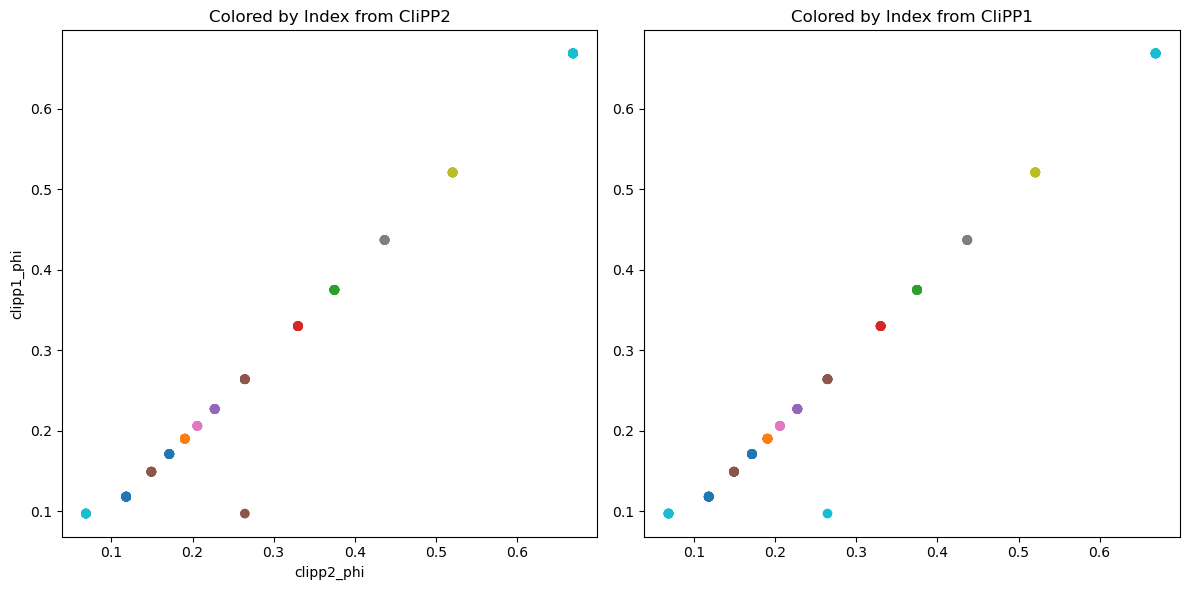

In [17]:
import matplotlib.pyplot as plt
# Create scatter plot
groups1 = df['clipp2_label']
groups2 = df['clip_res']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(df['clipp2_phi'], df['clip_phi'], c=groups1, cmap='tab10')
axes[0].set_xlabel('clipp2_phi')
axes[0].set_ylabel('clipp1_phi')
axes[0].set_title('Colored by Index from CliPP2')

axes[1].scatter(df['clipp2_phi'], df['clip_phi'], c=groups2, cmap='tab10')
axes[0].set_xlabel('clipp2_phi')
axes[0].set_ylabel('clipp1_phi')
axes[1].set_title('Colored by Index from CliPP1')

plt.tight_layout()
plt.show()

In [41]:
for i in range(len(gamma_list)):
    clip2_res = res[i]['label']
    lam = gamma_list[i]
    clip_res = pd.read_csv(f'/Users/yuding/Dropbox/MDA/Subclonal Reconstruction/CliPP-1.2.1/sample_id/preliminary_result/lam{lam}_label.txt', sep='\t', header=None)
    clip_res = clip_res.to_numpy()
    clip_res = clip_res.reshape(-1)
    from sklearn.metrics import adjusted_rand_score
    # Calculate the Adjusted Rand Index
    ari = adjusted_rand_score(clip2_res, clip_res)
    print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.9821630299066532
Adjusted Rand Index: 1.0
Adjusted Rand Index: 0.8679453875840178
Adjusted Rand Index: 1.0
Adjusted Rand Index: 0.9876508890290712
Adjusted Rand Index: 1.0
Adjusted Rand Index: 0.9767977402509365
Adjusted Rand Index: 1.0
Adjusted Rand Index: 1.0
Adjusted Rand Index: 0.9839144897352895
Adjusted Rand Index: 1.0


In [ ]:
i = 2
clip2_res = res[i]['label']
lam = gamma_list[i]
clip_res = pd.read_csv(f'/Users/yuding/Dropbox/MDA/Subclonal Reconstruction/CliPP-1.2.1/sample_id/preliminary_result/lam{lam}_label.txt', sep='\t')
clip_res['clipp2_res'] = clip2_res
from sklearn.metrics import adjusted_rand_score
# Calculate the Adjusted Rand Index
ari = adjusted_rand_score(clip2_res, clip_res['cluster_index'])
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.8679453875840178


In [ ]:
clip_res

,chromosome_index,position,cluster_index,clipp2_res
0,1,7,7,0.0
1,1,12,4,5.0
2,1,17,0,9.0
3,1,22,9,1.0
4,1,27,0,9.0
...,...,...,...,...
95,1,482,9,1.0
96,1,487,5,4.0
97,1,492,7,0.0
98,1,497,7,0.0


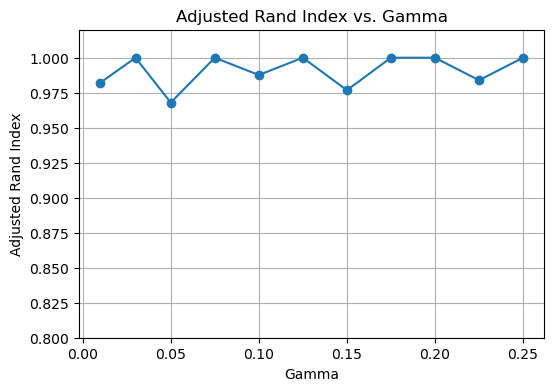

In [43]:
import matplotlib.pyplot as plt

# Your gamma values
gamma_list = [0.01, 0.03, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25]

# Corresponding ARI values
ari_values = [
    0.9821630299066532,
    1.0,
    0.9679453875840178,
    1.0,
    0.9876508890290712,
    1.0,
    0.9767977402509365,
    1.0,
    1.0,
    0.9839144897352895,
    1.0
]

# Create a simple line plot
plt.figure(figsize=(6,4))
plt.plot(gamma_list, ari_values, marker='o', linestyle='-')
plt.title('Adjusted Rand Index vs. Gamma')
plt.xlabel('Gamma')
plt.ylabel('Adjusted Rand Index')
plt.ylim([0.8, 1.02])  # just to set a clear y-range
plt.grid(True)
plt.show()